<a href="https://colab.research.google.com/github/Alex-Jung-HB/0715_python_YOLOv8_1_image/blob/main/0715_python_YOLOv8_1_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ultralytics installing for YOLO

In [1]:
!pip install ultralytics    # pip:the standard package installer for Python
from google.colab import files
from ultralytics import YOLO    # COCO ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú YOLOv8n Î™®Îç∏ Î°úÎìú
model = YOLO("yolov8n.pt")    # Î™®Îç∏ Ï†ïÎ≥¥ ÌëúÏãú (ÏÑ†ÌÉùÏÇ¨Ìï≠)
model.info()    # YOLOv8 Î™®Îç∏Ïùò ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º Ï∂úÎ†•
'''
model_n.info(): Í∞ÄÏû• Í∞ÄÎ≤ºÏö¥ Î™®Îç∏
model_s.info(): Ï§ëÍ∞Ñ ÌÅ¨Í∏∞
model_m.info(): Îçî ÌÅ∞ Î™®Îç∏
'''
results = model.train(data="coco8.yaml", epochs=10, imgsz=640)    # coco8Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÌïôÏäµÌïú Í≤∞Í≥º Ï†ÄÏû•
'''
data="coco8.yaml": COCO8ÏùÄ COCO Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï∂ïÏÜå Î≤ÑÏ†Ñ
  - 8Í∞ú Ïù¥ÎØ∏ÏßÄÎßå Ìè¨Ìï®(ÌÖåÏä§Ìä∏Ïö©)
  - 80Í∞ú ÌÅ¥ÎûòÏä§ Î™®Îëê Ìè¨Ìï®
  - Îπ†Î•∏ ÌÖåÏä§Ìä∏/Îç∞Î™®Ïö©)
epochs: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìïú Î≤à ÌïôÏäµÌïòÎäî Îã®ÏúÑ
  - epochs=1   Îß§Ïö∞ Îπ†Î¶Ñ, ÏÑ±Îä• ÎÇÆÏùå
  - epochs=10  ÌÖåÏä§Ìä∏Ïö© (ÌòÑÏû¨ ÏÑ§Ï†ï)
  - epochs=100 ÏùºÎ∞òÏ†ÅÏù∏ ÌïôÏäµ
  - epochs=300 Í≥†ÏÑ±Îä• ÌïôÏäµ
imgsz=640: ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ (ÌîΩÏÖÄ)
  - imgsz=320  Îπ†Î¶Ñ, Ï†ïÌôïÎèÑ ÎÇÆÏùå
  - imgsz=640  ÌëúÏ§Ä (ÌòÑÏû¨ ÏÑ§Ï†ï)
  - imgsz=1280 ÎäêÎ¶º, Ï†ïÌôïÎèÑ ÎÜíÏùå
'''

uploaded = files.upload()
image_path = list(uploaded.keys())[0]   # dict_keysÎ•º Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò. uploaded.keys(): ÏóÖÎ°úÎìúÎêú ÌååÏùºÎ™ÖÎì§ÏùÑ Î∞òÌôò
results = model(image_path)   # YOLOv8 Î™®Îç∏Ïù¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞ùÏ≤¥ ÌÉêÏßÄ(Ï∂îÎ°†)Î•º Ïã§Ìñâ. ÏûÖÎ†•Îêú Ïù¥ÎØ∏ÏßÄÎ•º ÌïôÏäµÎêú Î™®Îç∏ÏóêÏÑú Ï≤òÎ¶¨Ìïú Îí§ Í≤∞Í≥ºÎ°ú ÎèÑÏ∂ú
results[0].show()

KeyboardInterrupt: 

Improved codes to detect tiny objects such as traffic lights generatng by Gemini

In [ ]:
# 1. Ultralytics ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
!pip install ultralytics matplotlib opencv-python numpy

from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import gc

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!")

# 2. YOLOv8 Î™®Îç∏ Î°úÎìú (Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ yolov8m.pt ÏÇ¨Ïö©)
try:
    model = YOLO("yolov8m.pt") # Î™®Îç∏ Î≥ÄÍ≤Ω: yolov8x.pt -> yolov8m.pt
    print("\nYOLOv8m Î™®Îç∏ Î°úÎìú ÏôÑÎ£å!")
    model.info()
except Exception as e:
    print(f"Î™®Îç∏ Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞ÏùÑ ÌôïÏù∏ÌïòÍ±∞ÎÇò, Ïû†Ïãú ÌõÑ Îã§Ïãú ÏãúÎèÑÌï¥ Ï£ºÏÑ∏Ïöî.")
    exit()

# 3. Î™®Îç∏ ÌïôÏäµ (Training) - Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ imgszÏôÄ batch ÌÅ¨Í∏∞ Ï°∞Ï†à
print("\nÎ™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÌï©ÎãàÎã§. (ÌÖåÏä§Ìä∏Ïö©: coco8.yaml, epochs=100, imgsz=960, batch=4)")
print("Ïã§Ï†ú ÏÇ¨Ïö© ÏãúÏóêÎäî Îçî ÎßéÏùÄ ÏóêÌè¨ÌÅ¨ÏôÄ Ïã§Ï†ú ÎèÑÎ°ú ÏÉÅÌô© Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")
try:
    results_train = model.train(
        data="coco8.yaml", # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω ÌïÑÏöî
        epochs=100,
        imgsz=960,        # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Î≥ÄÍ≤Ω: 1280 -> 960
        batch=4,          # Î∞∞Ïπò ÌÅ¨Í∏∞ Î™ÖÏãúÏ†Å ÏÑ§Ï†ï
        patience=50,
        val=True
    )
    print("\nÎ™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")
    del results_train
    gc.collect()
except Exception as e:
    print(f"Î™®Îç∏ ÌïôÏäµ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("GPU Î©îÎ™®Î¶¨Í∞Ä Î∂ÄÏ°±ÌïòÍ±∞ÎÇò, Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÍ∞Ä ÏûòÎ™ªÎêòÏóàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.")
    exit()

# 4. Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è Ï∂îÎ°†
print("\nÍ∞ùÏ≤¥ ÌÉêÏßÄÎ•º ÏúÑÌïú Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî.")
uploaded = None
try:
    uploaded = files.upload()
except Exception as e:
    print(f"ÌååÏùº ÏóÖÎ°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("Colab ÌôòÍ≤ΩÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìú Ïù∏ÌÑ∞ÌéòÏù¥Ïä§Í∞Ä Ï†úÎåÄÎ°ú ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

if not uploaded:
    print("Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìúÍ∞Ä Ï∑®ÏÜåÎêòÏóàÍ±∞ÎÇò ÌååÏùºÏù¥ ÏÑ†ÌÉùÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. ÌîÑÎ°úÍ∑∏Îû®Ïù¥ Ï¢ÖÎ£åÎê©ÎãàÎã§.")
else:
    image_path = list(uploaded.keys())[0]
    print(f"Ïù¥ÎØ∏ÏßÄ '{image_path}' ÏóÖÎ°úÎìú ÏôÑÎ£å.")

    # 5. Î™®Îç∏ Ï∂îÎ°† (Inference)
    print("\nÏóÖÎ°úÎìúÎêú Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ Í∞ùÏ≤¥ ÌÉêÏßÄÎ•º ÏãúÏûëÌï©ÎãàÎã§...")
    try:
        # Ï∂îÎ°† ÏãúÏóêÎèÑ imgszÎ•º ÌïôÏäµ ÏãúÏôÄ ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ï
        inference_results = model(image_path, imgsz=960, conf=0.25)
        print("Í∞ùÏ≤¥ ÌÉêÏßÄ ÏôÑÎ£å!")

        # 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏãúÍ∞ÅÌôî Î∂ÄÎ∂Ñ)
        if inference_results and len(inference_results) > 0:
            # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î°úÎìú (OpenCVÎäî BGR ÏàúÏÑúÎ°ú ÏùΩÏùå)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}")
                exit()

            # Ï∂îÎ°† Í≤∞Í≥ºÎ•º Î∞òÎ≥µÌïòÎ©∞ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄ ÌÖçÏä§Ìä∏ ÏßÅÏ†ë Í∑∏Î¶¨Í∏∞
            for r in inference_results:
                boxes = r.boxes # DetectronResult Í∞ùÏ≤¥ÏóêÏÑú Boxes Ï∂îÏ∂ú

                for box in boxes:
                    # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Ï∂îÏ∂ú (x1, y1, x2, y2)
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = box.conf[0].item() # Ïã†Î¢∞ÎèÑ
                    cls = int(box.cls[0].item()) # ÌÅ¥ÎûòÏä§ ID
                    name = model.names[cls] # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ

                    # Î∞îÏö¥Îî© Î∞ïÏä§ ÏÉâÏÉÅ (B, G, R) - Ïòà: Ï¥àÎ°ùÏÉâ
                    color = (0, 255, 0) # Green

                    # Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                    # ÌÖçÏä§Ìä∏ ÎÇ¥Ïö©
                    label = f'{name} {conf:.2f}'

                    # Ìè∞Ìä∏ ÏÑ§Ï†ï
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 0.5 # Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à (Í∏∞Î≥∏ 0.5, Îçî ÏûëÍ≤å ÌïòÎ†§Î©¥ 0.3 Îì±)
                    font_thickness = 1 # Í∏ÄÏî® ÎëêÍªò

                    # ÌÖçÏä§Ìä∏ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞ (Î∞∞Í≤Ω ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï®)
                    (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

                    # ÌÖçÏä§Ìä∏ ÏúÑÏπò (Î∞ïÏä§ ÏúÑÏóê)
                    text_x = x1
                    text_y = y1 - 10 # Î∞ïÏä§ ÏúÑ 10ÌîΩÏÖÄ ÏúÑÎ°ú

                    # ÌÖçÏä§Ìä∏ Î∞∞Í≤Ω ÏÇ¨Í∞ÅÌòï (Ìà¨Î™ÖÌïòÍ≤å ÎßåÎì§Í∏∞ ÏúÑÌï¥ Í∑∏Î¶¨ÏßÄ ÏïäÏùå)
                    # cv2.rectangle(img, (text_x, text_y - text_height - baseline),
                    #               (text_x + text_width, text_y + baseline),
                    #               (0, 0, 0), -1) # Í≤ÄÏùÄÏÉâ Î∞∞Í≤Ω, Ï±ÑÏö∞Í∏∞

                    # ÌÖçÏä§Ìä∏ Í∑∏Î¶¨Í∏∞
                    # (ÏÉâÏÉÅ: Ìù∞ÏÉâ, Î∞∞Í≤Ω ÏóÜÏùå)
                    cv2.putText(img, label, (text_x, text_y), font, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)


            # BGRÏùÑ RGBÎ°ú Î≥ÄÌôòÌïòÏó¨ MatplotlibÏúºÎ°ú ÌëúÏãú
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(12, 10))
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title('YOLOv8 Object Detection Results (Custom Visualization)')
            plt.show()

        else:
            print("ÌÉêÏßÄÎêú Í∞ùÏ≤¥Í∞Ä ÏóÜÍ±∞ÎÇò Ï∂îÎ°† Í≤∞Í≥ºÍ∞Ä Ïú†Ìö®ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

    except Exception as e:
        print(f"Î™®Îç∏ Ï∂îÎ°† ÎòêÎäî Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        print("Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ ÏÜêÏÉÅÎêòÏóàÍ±∞ÎÇò, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú Î°úÎìúÎêòÏßÄ ÏïäÏïòÏùÑ Ïàò ÏûàÏäµÎãàÎã§.")

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 21.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 49.7M/49.7M [00:00<00:00, 135MB/s]



YOLOv8m Î™®Îç∏ Î°úÎìú ÏôÑÎ£å!
YOLOv8m summary: 169 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs

Î™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÌï©ÎãàÎã§. (ÌÖåÏä§Ìä∏Ïö©: coco8.yaml, epochs=100, imgsz=960, batch=4)
Ïã§Ï†ú ÏÇ¨Ïö© ÏãúÏóêÎäî Îçî ÎßéÏùÄ ÏóêÌè¨ÌÅ¨ÏôÄ Ïã§Ï†ú ÎèÑÎ°ú ÏÉÅÌô© Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
Ultralytics 8.3.167 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 433k/433k [00:00<00:00, 10.3MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:00<00:00, 2724.07file/s]

Dataset download success ‚úÖ (0.3s), saved to /content/datasets



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 15.8MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              


  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00, 66.08it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 965.1¬±273.0 MB/s, size: 54.0 KB)


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00, 24036.13it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G     0.6974      2.346      1.218         27        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [01:00<00:00, 60.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:20<00:00, 20.24s/it]

                   all          4         17      0.817       0.82      0.907      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.9041      2.182      1.416         22        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:56<00:00, 56.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:17<00:00, 17.40s/it]

                   all          4         17      0.824      0.818      0.907      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.8455      2.125      1.284         26        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:55<00:00, 55.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.49s/it]

                   all          4         17      0.829      0.813      0.901      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.086      2.146      1.755         28        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:59<00:00, 59.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.66s/it]

                   all          4         17      0.837      0.808      0.901       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.222       2.53      1.813         23        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:55<00:00, 55.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:17<00:00, 17.52s/it]

                   all          4         17      0.837      0.808      0.901       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.9876      2.932      1.519         23        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:56<00:00, 56.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.92s/it]

                   all          4         17      0.844      0.807      0.903       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.8705      1.766      1.287         35        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:52<00:00, 52.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.40s/it]

                   all          4         17      0.844      0.807      0.903       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.8854       1.42      1.356         33        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:54<00:00, 54.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:17<00:00, 17.15s/it]

                   all          4         17      0.839      0.809      0.903      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.117      1.306      1.586         19        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:52<00:00, 52.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.40s/it]

                   all          4         17      0.839      0.809      0.903      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.9666      1.431      1.441         30        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:55<00:00, 55.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:17<00:00, 17.42s/it]

                   all          4         17      0.834      0.815      0.896      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G       1.12      3.021       1.68         24        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:54<00:00, 54.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.63s/it]

                   all          4         17      0.834      0.815      0.896      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.184      1.846       1.63         16        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:56<00:00, 56.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.27s/it]

                   all          4         17      0.834      0.815      0.896      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.126        1.6      1.645         39        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:54<00:00, 54.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.51s/it]

                   all          4         17      0.823      0.824      0.886      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.282      1.425      1.876         23        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:53<00:00, 53.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.50s/it]

                   all          4         17      0.823      0.824      0.886      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.8236      1.205      1.395         22        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:56<00:00, 56.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:17<00:00, 17.65s/it]

                   all          4         17      0.823      0.824      0.886      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G       1.14      1.942      1.567         24        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:54<00:00, 54.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.37s/it]

                   all          4         17      0.765      0.842      0.889       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.038      1.817        1.6         18        960: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:55<00:00, 55.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:16<00:00, 16.48s/it]

                   all          4         17      0.765      0.842      0.889       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]

Îã§ÏàòÏùò Ïù¥ÎØ∏ÏßÄ ÎèôÏãú Ï≤òÎ¶¨

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.167 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 846.3¬±294.0 MB/s, size: 54.0 KB)



val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/detect/train8/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.082      1.853      1.368         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         17      0.634       0.87      0.888      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9278      3.138      1.165         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.79s/it]

                   all          4         17      0.703      0.833      0.888      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9953      2.825      1.309         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         17      0.725      0.831      0.889      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.235      2.602      1.454         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         17      0.629      0.833      0.873      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8402      2.598      1.306         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:04<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         17      0.683      0.833      0.873      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.049      2.406      1.444         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.16s/it]

                   all          4         17      0.709       0.75      0.879      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.268       2.48       1.46         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.70s/it]

                   all          4         17      0.767      0.743      0.879      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8933      1.874      1.264         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         17      0.741       0.75      0.893      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9484       1.66      1.182         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         17      0.729       0.75      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7684      1.957       1.22         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:04<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         17      0.717       0.75      0.778      0.594



10 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.5MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.167 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  1.05it/s]


                   all          4         17      0.633      0.871      0.888      0.624
                person          3         10      0.696        0.5       0.52      0.279
                   dog          1          1      0.398          1      0.995      0.597
                 horse          1          2      0.749          1      0.995      0.598
              elephant          1          2      0.574      0.723      0.828      0.381
              umbrella          1          1      0.566          1      0.995      0.995
          potted plant          1          1      0.817          1      0.995      0.895
Speed: 2.3ms preprocess, 224.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train8


Saving baby.jpg to baby (5).jpg
Saving building.jpg to building (5).jpg
Saving earth.jpg to earth (5).jpg
Saving pineapple.jpg to pineapple (5).jpg
Saving plains-zebra.webp to plains-zebra (5).webp
Saving rabit.webp to rabit (5).webp
Saving robot.jpg to robot (5).jpg
Saving watermallon.jpg to watermallon (5).jpg
Saving Ï†ÄÏä§Ìã¥ÎπÑÎ≤Ñ.jpg to Ï†ÄÏä§Ìã¥ÎπÑÎ≤Ñ (5).jpg
Saving ÌéòÎùºÎ¶¨.jpg to ÌéòÎùºÎ¶¨ (5).jpg

0: 640x640 1 person, 214.6ms
1: 640x640 (no detections), 214.6ms
2: 640x640 (no detections), 214.6ms
3: 640x640 1 vase, 214.6ms
4: 640x640 1 zebra, 214.6ms
5: 640x640 1 bear, 214.6ms
6: 640x640 (no detections), 214.6ms
7: 640x640 1 orange, 1 broccoli, 214.6ms
8: 640x640 1 person, 214.6ms
9: 640x640 1 car, 214.6ms
Speed: 4.1ms preprocess, 214.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

--- Result for Image 1: baby (5).jpg ---


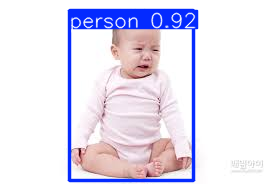


--- Result for Image 2: building (5).jpg ---


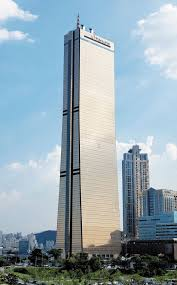


--- Result for Image 3: earth (5).jpg ---


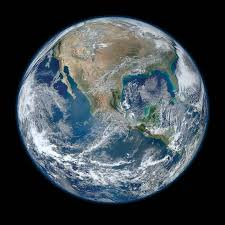


--- Result for Image 4: pineapple (5).jpg ---


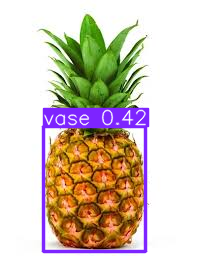


--- Result for Image 5: plains-zebra (5).webp ---


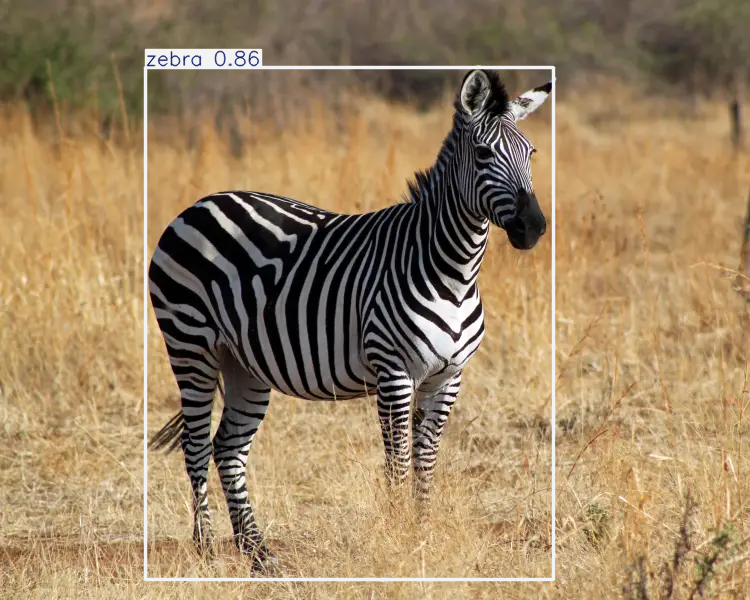


--- Result for Image 6: rabit (5).webp ---


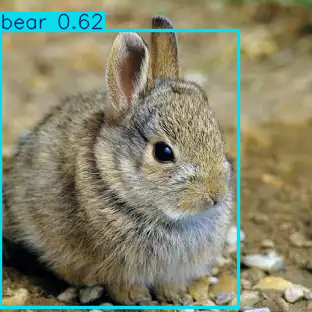


--- Result for Image 7: robot (5).jpg ---


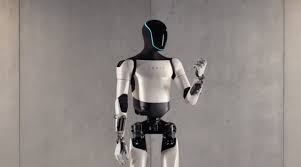


--- Result for Image 8: watermallon (5).jpg ---


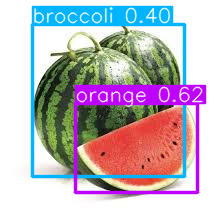


--- Result for Image 9: Ï†ÄÏä§Ìã¥ÎπÑÎ≤Ñ (5).jpg ---


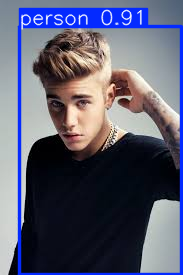


--- Result for Image 10: ÌéòÎùºÎ¶¨ (5).jpg ---


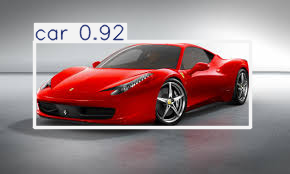

In [ ]:
!pip install ultralytics    # pip:the standard package installer for Python
from google.colab import files
from ultralytics import YOLO    # COCO ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú YOLOv8n Î™®Îç∏ Î°úÎìú
model = YOLO("yolov8n.pt")    # Î™®Îç∏ Ï†ïÎ≥¥ ÌëúÏãú (ÏÑ†ÌÉùÏÇ¨Ìï≠)
model.info()    # YOLOv8 Î™®Îç∏Ïùò ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º Ï∂úÎ†•
results = model.train(data="coco8.yaml", epochs=10, imgsz=640)    # coco8Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÌïôÏäµÌïú Í≤∞Í≥º Ï†ÄÏû•

# Upload multiple images
uploaded = files.upload()
all_image_paths = list(uploaded.keys())   # Îã§ÏàòÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÏàòÏàòÏ†ï

# Process all images at once (more efficient)
results = model(all_image_paths)  # Pass list of paths    # Îã§ÏàòÏùò ÏûÖÎ†•Îêú Ïù¥ÎØ∏ÏßÄÎ•º Î™®Îëê Ï≤òÎ¶¨ÌïòÎèÑÎ°ù ÏàòÏ†ï

# Show results for each image
for i, result in enumerate(results):    # ÏûÖÎ†•Îêú Ïù¥ÎØ∏ÏßÄÏóê ÏàúÎ≤àÎß§ÍπÄ
    print(f"\n--- Result for Image {i+1}: {all_image_paths[i]} ---")    # Î≤àÌò∏Î•º 1Ïî© Ïò¨Î†§Í∞ÄÎ©¥ÏÑú Ï∂úÎ†•Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Î©îÏÑ∏ÏßÄ Ï∂úÎ†•
    result.show()

Ï∂úÎ†•Îêú Í∑∏Î¶ºÏùÑ 2Ìñâ 5Ïó¥Î°ú Î∞∞ÏπòÎêòÎèÑÎ°ù ÏàòÏ†ï

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.167 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 558.8¬±140.1 MB/s, size: 54.0 KB)



val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/detect/train9/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.082      1.853      1.368         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         17      0.634       0.87      0.888      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9278      3.138      1.165         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.80s/it]

                   all          4         17      0.703      0.833      0.888      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9953      2.825      1.309         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.18s/it]

                   all          4         17      0.725      0.831      0.889      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.235      2.602      1.454         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.13s/it]

                   all          4         17      0.629      0.833      0.873      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8402      2.598      1.306         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:04<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         17      0.683      0.833      0.873      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.049      2.406      1.444         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         17      0.709       0.75      0.879      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.268       2.48       1.46         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.47s/it]

                   all          4         17      0.767      0.743      0.879      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8933      1.874      1.264         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         17      0.741       0.75      0.893      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9484       1.66      1.182         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.14s/it]

                   all          4         17      0.729       0.75      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7684      1.957       1.22         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:04<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.16s/it]

                   all          4         17      0.717       0.75      0.778      0.594



10 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.167 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  1.05it/s]


                   all          4         17      0.633      0.871      0.888      0.624
                person          3         10      0.696        0.5       0.52      0.279
                   dog          1          1      0.398          1      0.995      0.597
                 horse          1          2      0.749          1      0.995      0.598
              elephant          1          2      0.574      0.723      0.828      0.381
              umbrella          1          1      0.566          1      0.995      0.995
          potted plant          1          1      0.817          1      0.995      0.895
Speed: 2.3ms preprocess, 225.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train9


Saving KakaoTalk_20250704_210829744_01.jpg to KakaoTalk_20250704_210829744_01.jpg
ÏóÖÎ°úÎìúÎêú Ïù¥ÎØ∏ÏßÄ: 1Í∞ú

0: 480x640 6 cars, 1 truck, 1 traffic light, 180.5ms
Speed: 4.6ms preprocess, 180.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

üì∏ KakaoTalk_20250704_210829744_01.jpg:
   ÌÉêÏßÄÎêú Í∞ùÏ≤¥: 8Í∞ú
     - car: 0.87
     - car: 0.85
     - car: 0.79
     - truck: 0.77
     - car: 0.60
     - car: 0.58
     - traffic light: 0.36
     - car: 0.32


/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 53456 (\N{HANGUL SYLLABLE TAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-830846666.py:83: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.ti

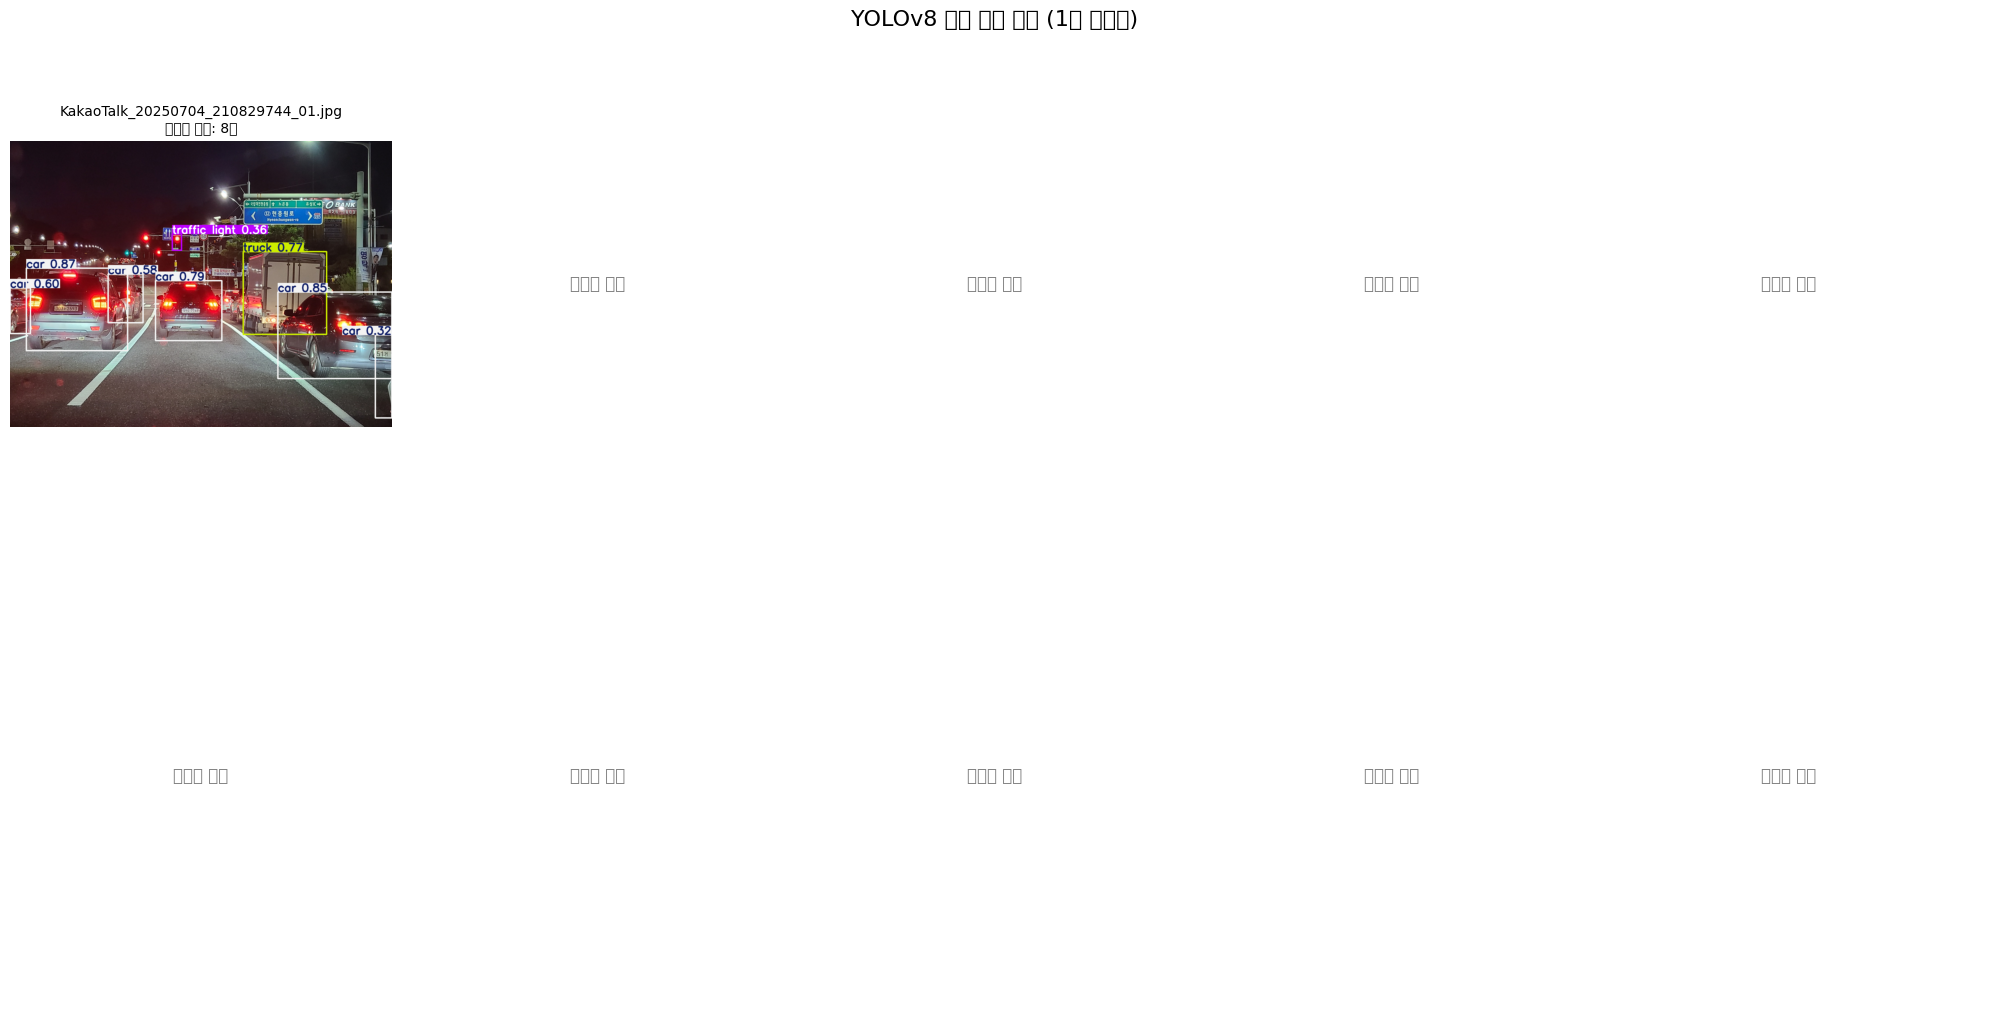

In [ ]:
!pip install ultralytics    # pip:the standard package installer for Python
!pip install opencv-python  # ‚Üê Ïù¥ Ï§ÑÎßå Ï∂îÍ∞Ä!

from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt  # ÏúÑÎ°ú Ïù¥Îèô
import cv2  # ÏúÑÎ°ú Ïù¥Îèô

model = YOLO("yolov8n.pt")    # Î™®Îç∏ Ï†ïÎ≥¥ ÌëúÏãú (ÏÑ†ÌÉùÏÇ¨Ìï≠)
model.info()    # YOLOv8 Î™®Îç∏Ïùò ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º Ï∂úÎ†•
results = model.train(data="coco8.yaml", epochs=10, imgsz=640)    # coco8Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÌïôÏäµÌïú Í≤∞Í≥º Ï†ÄÏû•

# ========== Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ==========
uploaded = files.upload()
all_image_paths = list(uploaded.keys())   # Î™®Îì† ÏóÖÎ°úÎìúÎêú ÌååÏùºÎ™ÖÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
print(f"ÏóÖÎ°úÎìúÎêú Ïù¥ÎØ∏ÏßÄ: {len(all_image_paths)}Í∞ú")

# Î™®Îì† Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ Í∞ùÏ≤¥ ÌÉêÏßÄ Ïã§Ìñâ
detection_results = model(all_image_paths)   # YOLO8Ïù¥ Ïó¨Îü¨ Ïù¥ÎØ∏ÏßÄÎ•º Î∞õÏïÑ ÌïúÎ≤àÏóê Ï≤òÎ¶¨

# 2Ìñâ 5Ïó¥ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
rows, cols = 2, 5
max_images = rows * cols  # ÏµúÎåÄ 10Í∞ú Ïù¥ÎØ∏ÏßÄ
num_images = min(len(detection_results), max_images)    # Ïã§Ï†ú ÌëúÏãúÌï† Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎ•º Í≤∞Ï†ï. min(A,B): Îëê Í∞ú Ï§ë ÏûëÏùÄ Ïà´ÏûêÎ°ú Í≤∞Ï†ï

# Figure ÏÉùÏÑ±
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # 2D Î∞∞Ïó¥ÏùÑ 1DÎ°ú Î≥ÄÌôòÌïòÏó¨ Ï≤òÎ¶¨Î•º ÏâΩÍ≤å

'''
2D Î∞∞Ïó¥ (flatten Ï†Ñ):
Grid Layout:                  axes Î∞∞Ïó¥ Íµ¨Ï°∞:
‚îå‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îê    [[axes[0,0], axes[0,1], axes[0,2], axes[0,3], axes[0,4]],
‚îÇ   0‚îÇ   1‚îÇ   2‚îÇ   3‚îÇ   4‚îÇ     [axes[1,0], axes[1,1], axes[1,2], axes[1,3], axes[1,4]]]
‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§
‚îÇ   5‚îÇ   6‚îÇ   7‚îÇ   8‚îÇ   9‚îÇ    Ï†ëÍ∑º: axes[Ìñâ][Ïó¥]
‚îî‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îò

1D Î∞∞Ïó¥ (flatten ÌõÑ):
Grid Layout:                  axes Î∞∞Ïó¥ Íµ¨Ï°∞:
‚îå‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îê    [axes[0], axes[1], axes[2], axes[3], axes[4],
‚îÇ   0‚îÇ   1‚îÇ   2‚îÇ   3‚îÇ   4‚îÇ     axes[5], axes[6], axes[7], axes[8], axes[9]]
‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§
‚îÇ   5‚îÇ   6‚îÇ   7‚îÇ   8‚îÇ   9‚îÇ    Ï†ëÍ∑º: axes[Ïù∏Îç±Ïä§]
‚îî‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îò
'''

# Í∞Å Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥ºÎ•º Í∑∏Î¶¨ÎìúÏóê ÌëúÏãú
for i in range(max_images):
    if i < num_images:  # Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÏö∞
        result = detection_results[i]   # iÎ≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Ï≤òÎ¶¨Í≤∞Í≥º Ï∂úÎ†•
        annotated_img = result.plot()   # ÌÉêÏßÄ Í≤∞Í≥ºÍ∞Ä Í∑∏Î†§ÏßÑ Ïù¥ÎØ∏ÏßÄ

        # ‚úÖ ÏàòÏ†ï: continue Î°úÏßÅÏùÑ Î®ºÏ†Ä Ï≤òÎ¶¨
        if annotated_img is None:   # if - contine Î¨∏Ïû•. True --> ÎÑòÏñ¥Í∞ÄÏÑú Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏, False --> Îã§Ïùå ÏΩîÎìúÎ°ú ÏßÑÏûÖ(annotated_ing = ......)
            continue    # Î∞òÎ≥µÎ¨∏ÏóêÏÑú ÌòÑÏû¨ Î∞òÎ≥µÏùÑ Í±¥ÎÑàÎõ∞Í≥† Îã§Ïùå Î∞òÎ≥µÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÎäî Python Ï†úÏñ¥Î¨∏(annotated_imgÍ∞Ä ÎÇòÏò¨ ÎïåÍπåÏßÄ ÎÑòÏñ¥Í∞ÄÎùº)

        # ‚úÖ ÏàòÏ†ï: Ï†ïÏÉÅÏ†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨
        annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)   # BGR(Blue-Green-Red) ‚Üí RGB(Red-Green-Blue) ÏÉâÏÉÅ ÏàúÏÑú Î≥ÄÌôò, OpenCVÎäî BGR ÏÇ¨Ïö©, matplotlibÎäî RGB ÏÇ¨Ïö©

        # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
        '''
        annotated_img: Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä Í∑∏Î†§ÏßÑ ÌÉêÏßÄ Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ
        .imshow(): matplotlibÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌïòÎäî Ìï®Ïàò
        axes[i]: iÎ≤àÏß∏ subplot (Í∑∏Î¶¨ÎìúÏùò ÌäπÏ†ï ÏúÑÏπò(Ïù¥ÎØ∏ÏßÄÍ∞Ä Îì§Ïñ¥Í∞ÄÎäî Ïπ∏))
        '''
        axes[i].imshow(annotated_img)
        axes[i].set_title(f'{all_image_paths[i]}\nÌÉêÏßÄÎêú Í∞ùÏ≤¥: {len(result.boxes)}Í∞ú', fontsize=10)
        axes[i].axis('off')

        print(f"\nüì∏ {all_image_paths[i]}:")
        print(f"   ÌÉêÏßÄÎêú Í∞ùÏ≤¥: {len(result.boxes)}Í∞ú")
        for j, box in enumerate(result.boxes):
            class_name = result.names[int(box.cls)]
            confidence = float(box.conf)
            print(f"     - {class_name}: {confidence:.2f}")

    else:  # ‚úÖ ÏàòÏ†ï: Ïò¨Î∞îÎ•∏ Îì§Ïó¨Ïì∞Í∏∞
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, 'Ïù¥ÎØ∏ÏßÄ ÏóÜÏùå', ha='center', va='center',
                    fontsize=12, color='gray', transform=axes[i].transAxes)

plt.tight_layout()
plt.suptitle(f'YOLOv8 Í∞ùÏ≤¥ ÌÉêÏßÄ Í≤∞Í≥º ({num_images}Í∞ú Ïù¥ÎØ∏ÏßÄ)', fontsize=16, y=1.02)
plt.show()